###  Let's get our hands dirty!

This notebook give a brief crash course getting you started with the basics of Julia.

###  Running this notebook

**Local install:**
- clone or download this notebook from https://github.com/mauro3/EGU2025-Julia-intro-and-showcase-for-geoscience
- run this to make sure packages are installed (this may take a while):

In [1]:
# using Pkg; Pkg.instantiate()

**Google Colab**:
- head to the README of [github.com/mauro3/EGU2025-Julia-intro-and-showcase-for-geoscience](https://github.com/mauro3/EGU2025-Julia-intro-and-showcase-for-geoscience?tab=readme-ov-file#running-on-google-colab)
- click on the link for the notebook you want to start up on Colab. This one is [`julia-basics.ipynb`](https://colab.research.google.com/github/mauro3/EGU2025-Julia-intro-and-showcase-for-geoscience/blob/main/intro-notebooks/julia-basics.ipynb#scrollTo=hauaC-M8PtMP)
- in the menu "Runtime"->"Change runtime type"->"Julia" (no, leaving it at "Julia v10.9" does not work...)
- no need to install packages as what we use here is pre-intsalled on Colab (i.e. Plots.jl)

###  Let's get our hands dirty!

We will now look at
- variables and types
- control flow
- functions
- modules and packages

The documentation of Julia is good and can be found at [https://docs.julialang.org](https://docs.julialang.org); although for learning it might be a bit terse...

There are also tutorials, see [https://julialang.org/learning/](https://julialang.org/learning/).

Furthermore, documentation can be gotten with `?xyz`.  Try it (in Jupyter notebooks this needs to be in a cell of its own):

In [2]:
# ?cos

## Variables, assignments, and types [5min]
[https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/)

In [3]:
a = 4
b = "a string"
c = b # now b and c bind to the same value

"a string"

Conventions:
- variables are (usually) lowercase, words can be separated by `_`
- function names are lowercase
- modules, packages and types are in CamelCase

### Variables: Unicode
From [https://docs.julialang.org/en/v1/manual/variables/](https://docs.julialang.org/en/v1/manual/variables/):

Unicode names (in UTF-8 encoding) are allowed and typed in LaTeX notation.  Try making a variable
- `δ = 99` with `\delta`+tab
- `x² = 25` with `x\^2`+tab

**Note for Colab**: unicode input in Colab does not work yet. As a work around, you can input it as
described above in a text-field and then copy it to a code-field. https://github.com/googlecolab/colabtools/issues/5218

In [4]:
δ = 99
x² = 25

25

### Basic datatypes
- numbers (Ints, Floats, Complex, etc.)
- strings
- tuples
- arrays
- dictionaries

In [5]:
1     # 64 bit integer (or 32 bit if on a 32-bit OS)
1.5   # Float64
1//2  # Rational

1//2

In [6]:
typeof(1.5)

Float64

In [7]:
"a string", (1, 3.5) # and tuple

("a string", (1, 3.5))

In [8]:
[1, 2, 3,] # array of eltype Int

3-element Vector{Int64}:
 1
 2
 3

In [9]:
Dict("a"=>1, "b"=>cos)

Dict{String, Any} with 2 entries:
  "b" => cos
  "a" => 1

## Array exercises [3min]

Arrays are the bread and butter of science...

- indexing starts at 1
- uses `[]`

Task: assign vectors to `a`, and `b` and the concatenate them using `;`:

In [10]:
a = [2, 3]
b = [4, 5]
[a ; b]

4-element Vector{Int64}:
 2
 3
 4
 5

Add new elements to the end of Vector `b` (hint look up the documentation for `push!`)

In [11]:
push!(b, 1)
push!(b, 3, 4)

5-element Vector{Int64}:
 4
 5
 1
 3
 4

### Array exercise: indexing

Access element `[1,2]` and `[2,1]` of Matrix `a` (hint use []):

In [12]:
a = rand(3,4)
a[1,2], a[2,1]

(0.6260494138451027, 0.3363909830481434)

Linear vs Cartesian indexing,
access the first element:

In [13]:
a[1]
a[1,1]

0.05845939781901044

Access the last element (look up `?end`) both with linear and Cartesian indices

In [14]:
a[end]
a[end, end]

0.6823949784221802

### Array exercise: indexing by ranges

Access the last row of `a` (hint use `1:end`)

In [15]:
a[end, 1:end]

4-element Vector{Float64}:
 0.6470832631816781
 0.527455134027236
 0.615589538921647
 0.6823949784221802

Access a 2x2 sub-matrix

In [16]:
a[1:2, 1:2]

2×2 Matrix{Float64}:
 0.0584594  0.626049
 0.336391   0.999813

################################################################

### A small detour: types

All values have types.  Arrays store in their type what type the elements can be.

> Arrays which have concrete element-types are more performant!

In [17]:
typeof([1, 2]), typeof([1.0, 2.0])

(Vector{Int64}, Vector{Float64})

Aside, they also store their dimension in the second parameter.

The type can be specified at creation

In [18]:
String["one", "two"]

2-element Vector{String}:
 "one"
 "two"

Create an array taking `Int` with no elements.  Push `1`, `1.0` and `1.5` to it.  What happens?

In [19]:
a = Int[]
push!(a, 1) ## works
push!(a, 1.0) ## works

2-element Vector{Int64}:
 1
 1

push!(a, 1.5) ## would error as 1.5 cannot be converted to an Int

Make an array of type `Any` (which can store any value).  Push a value of type
Int and one of type String to it.

In [20]:
a = []
push!(a, 5)
push!(a, "a")

2-element Vector{Any}:
 5
  "a"

## Control flow

Julia provides a variety of [control flow constructs](https://docs.julialang.org/en/v1/manual/control-flow/), of which we look at:

  * [Conditional Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation): `if`-`elseif`-`else` and `?:` (ternary operator).
  * [Short-Circuit Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation): logical operators `&&` (“and”) and `||` (“or”), and also chained comparisons.
  * [Repeated Evaluation: Loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops): `while` and `for`.

### Conditional evaluation
[https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation)

if-blocks

In [21]:
a = 77
if a==45
    println("Hi")
elseif a==77
    println("Hello")
else
    println("Grüss Gott")
end

Hello


### Conditional evaluation: the "ternary operator" `?`

In [22]:
a = 1
a > 5 ? "really big" : "not so big"

"not so big"

### Short circuit operators `&&` and `||`

[https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation](https://docs.julialang.org/en/v1/manual/control-flow/#Short-Circuit-Evaluation)

Relatively often used in Julia:
```
a < 0 && error("Not valid input for `a`")
```
which evaluates the statement after `&&` only if the first statement is true.

### Loops: `for` and `while`

[https://docs.julialang.org/en/v1/manual/control-flow/#man-loops](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops)

In [23]:
for i = 1:3
    println(i)
end

for i in ["dog", "cat"] ## `in` and `=` are equivalent for writing loops
    println(i)
end

i = 1
while i<4
    println(i)
    i += 1
end

1
2
3
dog
cat
1
2
3


## Functions

Functions can be defined in Julia in a number of ways.  In particular there is one variant
more suited to longer definitions, and one for one-liners:

```
function f(a, b)
   return a * b
end
f(a, b) = a * b
```

Defining many, short functions is typical in good Julia code.

See [https://docs.julialang.org/en/v1/manual/functions/](https://docs.julialang.org/en/v1/manual/functions/)

### Functions: exercises [5min]

Define a function `fn` in long-form which takes two arguments and multiplies them

In [24]:
function fn(a, b)
    return a*b
end

# it should pass this test
a, b = rand(4,5), 7
@assert fn(a,b) == a*b

### Functions: dot-syntax *IMPORTANT*

Functions which are scalar functions in maths, say `cos`, are only defined for scalars in Julia!

To apply them element-wise to vectors use `cos.([1,2])`.

Similarly the dot also works for infix functions, say `.+`.

Exercise: apply the `sin` function to a vector `1:10` and add `7`:

In [25]:
sin.(1:10) .+ 7

10-element Vector{Float64}:
 7.841470984807897
 7.909297426825682
 7.141120008059867
 6.243197504692072
 6.041075725336862
 6.720584501801074
 7.656986598718789
 7.9893582466233815
 7.4121184852417565
 6.4559788891106304

Broadcasting will extend row and column vectors into a matrix.
Try `(1:10) .+ (1:10)'`  (Note the `'`, this is the transpose operator)

In [26]:
(1:10) .+ (1:10)'

10×10 Matrix{Int64}:
  2   3   4   5   6   7   8   9  10  11
  3   4   5   6   7   8   9  10  11  12
  4   5   6   7   8   9  10  11  12  13
  5   6   7   8   9  10  11  12  13  14
  6   7   8   9  10  11  12  13  14  15
  7   8   9  10  11  12  13  14  15  16
  8   9  10  11  12  13  14  15  16  17
  9  10  11  12  13  14  15  16  17  18
 10  11  12  13  14  15  16  17  18  19
 11  12  13  14  15  16  17  18  19  20

### Functions: dot-syntax exercise

Evaluate the function `sin(x) + cos(y)` for
`x = 0:0.1:pi` and `y = -pi:0.1:pi`.  Remember to use `'`.

In [27]:
x,y = 0:0.1:pi, -pi:0.1:pi
sin.(x) .+ cos.(y')

32×63 Matrix{Float64}:
 -1.0       -0.995004  -0.980067  …  -0.96017   -0.983268  -0.996542
 -0.900167  -0.895171  -0.880233     -0.860337  -0.883435  -0.896709
 -0.801331  -0.796335  -0.781397     -0.761501  -0.784599  -0.797873
 -0.70448   -0.699484  -0.684546     -0.66465   -0.687748  -0.701022
 -0.610582  -0.605586  -0.590648     -0.570752  -0.59385   -0.607124
 -0.520574  -0.515579  -0.500641  …  -0.480745  -0.503843  -0.517117
 -0.435358  -0.430362  -0.415424     -0.395528  -0.418626  -0.4319
 -0.355782  -0.350786  -0.335849     -0.315953  -0.339051  -0.352324
 -0.282644  -0.277648  -0.26271      -0.242814  -0.265912  -0.279186
 -0.216673  -0.211677  -0.19674      -0.176843  -0.199942  -0.213215
  ⋮                               ⋱   ⋮                    
 -0.254295  -0.249299  -0.234361     -0.214465  -0.237563  -0.250837
 -0.324537  -0.319541  -0.304603     -0.284707  -0.307805  -0.321079
 -0.401528  -0.396532  -0.381594  …  -0.361698  -0.384796  -0.39807
 -0.484499  -0.479503  

### Functions: exclamation mark, e.g. `push!`

In Julia many functions have a `!` appended. For instance the `push!` function which you saw above.
- signifies that the function mutates some of its arguments
- is just a convention, i.e. the `!` is not a special syntax like the `.` you saw above
- also name your mutating functions with a `!` at the end

### Functions: anonymous functions

So far our function got a name with the definition. They can also be defined without name.

See [https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions)

In [28]:
map(x -> sin(x) + cos(x), 1:10)

10-element Vector{Float64}:
  1.3817732906760363
  0.4931505902785393
 -0.8488724885405782
 -1.4104461161715403
 -0.6752620891999122
  0.6807547884514401
  1.4108888530620938
  0.8438582128147682
 -0.49901177664292035
 -1.383092639965822

### Key feature: multiple dispatch functions

- Julia is not an object oriented language

OO:
- methods belong to objects
- method is selected based on first argument (e.g. `self` in Python)

Multiple dispatch:
- methods are separate from objects
- are selected based on all arguments
- similar to overloading but method selection occurs at runtime and not compile-time (see also video below)
> very natural for mathematical programming

JuliaCon 2019 presentation on the subject by Stefan Karpinski
(co-creator of Julia):

["The Unreasonable Effectiveness of Multiple Dispatch"](https://www.youtube.com/watch?v=kc9HwsxE1OY)

## Functions: Multiple dispatch demo

This cool example is based on a [blog post](https://giordano.github.io/blog/2017-11-03-rock-paper-scissors/) by Mose Giordano:

In [29]:
struct Rock end
struct Paper end
struct Scissors end
### of course structs could have fields as well
# struct Rock
#     color
#     name::String
#     density::Float64
# end

# define multi-method
play(::Rock, ::Paper) = "Paper wins"
play(::Rock, ::Scissors) = "Rock wins"
play(::Scissors, ::Paper) = "Scissors wins"
play(a, b) = play(b, a) # commutative

play(Scissors(), Rock())

"Rock wins"

### Multiple dispatch demo
Can easily be extended later:

- with new type:

In [30]:
struct Pond end
play(::Rock, ::Pond) = "Pond wins"
play(::Paper, ::Pond) = "Paper wins"
play(::Scissors, ::Pond) = "Pond wins"

play(Scissors(), Pond())

"Pond wins"

- with new function:

In [31]:
combine(::Rock, ::Paper) = "Paperweight"
combine(::Paper, ::Scissors) = "Two pieces of papers"
# ...

combine(Rock(), Paper())

"Paperweight"

*Multiple dispatch makes Julia packages very composable!*

This is a key characteristic of the Julia package ecosystem.

## Macros, i.e. those funky @-thingies

Macro calls can easily be spotted by the `@`, for example:

In [32]:
@assert 1!=2 "Error message: why is 1==2?"

Macros add extra functionality which simple functions could not provide. They do this by
operating on the code itself as opposed to the data like functions.

- in general, as a beginner just use the provided macros as specified in their docs
- think twice before you define your own macros (using `macro`) whether you can not achieve this with a function
- more at the [Julia-docs](https://docs.julialang.org/en/v1/manual/metaprogramming/)

## Modules and packages

Modules can be used to structure code into larger entities, and be used to divide it into
different name spaces.  We will not make much use of those, but if interested see
[https://docs.julialang.org/en/v1/manual/modules/](https://docs.julialang.org/en/v1/manual/modules/)

**Packages** are the way people distribute code and we'll make use of them extensively.
In the first example, the Lorenz ODE, you saw
```
using Plots
```
This statement loads the package `Plots`, the older standard plotting package, and makes its functions
and types available in the current session. Note that Plots.jl comes pre-installed on Colab; the plotting
package we recommend [`Makie.jl`](https://makie.org) would need to be installed.

Use `Plots.jl` it like so:

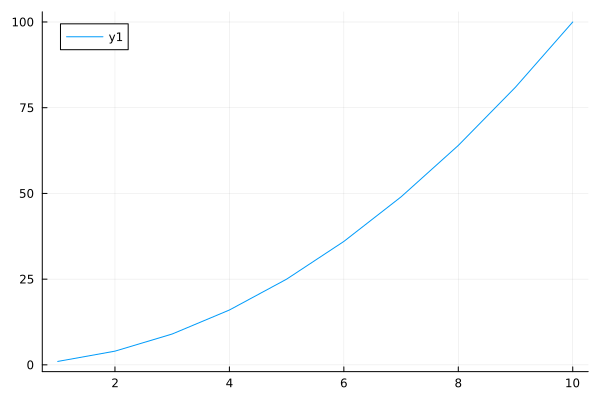

In [33]:
using Plots
plot( (1:10).^2 )

### Packages

All public Julia packages are listed on [https://juliahub.com/ui/Packages](https://juliahub.com/ui/Packages).

You can install a package, say [`UnPack`](https://github.com/mauro3/UnPack.jl) by
```julia-repl
using Pkg
Pkg.add("UnPack")
using UnPack
```

In the REPL, there is also a package-mode (hit `]`) which is for interactive use.

In [34]:
# Install a package the UnPack.jl package
# use it, query help on the macro `@unpack` which the package provides:

using Pkg
Pkg.add("UnPack")
using UnPack

   Resolving package versions...
    Updating `~/teaching/short-courses-and-talks/EGU2025-Julia-Intro/EGU2025-Julia-intro-and-showcase-for-geoscience/intro-notebooks/_scripts-to-generate-notebooks/Project.toml`
  [3a884ed6] + UnPack v1.0.2
    Updating `~/teaching/short-courses-and-talks/EGU2025-Julia-Intro/EGU2025-Julia-intro-and-showcase-for-geoscience/intro-notebooks/_scripts-to-generate-notebooks/Manifest.toml`
  [3a884ed6] + UnPack v1.0.2


In [35]:
#?@unpack

### Environments

Packages can be installed into a "environment", think virtual-env for Python. That is the recommended way to do this to
keep dependencies with their project and avoid package version conflicts. See:
- https://pkgdocs.julialang.org/v1/environments/

### Example: this course
This short course uses a few packages, you can see them in the various `Project.toml` files. The one for this notebook is
[Project.toml](https://github.com/mauro3/EGU2025-Julia-intro-and-showcase-for-geoscience/blob/main/intro-notebooks/Project.toml).
This is what gets intstalled with the invocation placed at the top of this notebook:
```julia
using Pkg; Pkg.instantiate()
```

## This concludes the rapid Julia intro

There are many more features of Julia for sure but this should get you started, and setup for
the exercises.  (Let us know if you feel we left something out which would have been helpful for the exercises).

Remember you can self-help with:
- using `?` at the notebook.  Similarly there is an `apropos` function.
- the docs are your friend [https://docs.julialang.org/en/v1/](https://docs.julialang.org/en/v1/)